In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

json = pd.read_json ('https://pomber.github.io/covid19/timeseries.json')

In [5]:
def plot_country(country):
    df = pd.json_normalize(json[country])
    diff = df[['confirmed']].diff()[1:]
    df = df[1:]
    discharged = df.recovered+df.deaths
    hospitalized = df.confirmed - discharged
    
    print(df.tail(1).to_string(index=False))
    print('new',diff.tail(1).to_string(index=False))

    plt.figure(figsize=(8,4))
    plt.plot(df.confirmed,label='confirmed')
    plt.plot(df.recovered,c='g',label='recovered')
    plt.plot(df.deaths,c='r',label='deaths')
    plt.plot(discharged,dashes=[2,2,6, 2],c='y',label='discharged')
    plt.plot(hospitalized,dashes=[2,2,6, 2],c='b',label='hospitalized')
    plt.title(country)
    plt.xlabel('day')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.scatter(df.confirmed,diff.confirmed)
    model = np.poly1d(np.polyfit(df.confirmed, diff.confirmed, 2))
    xp = np.linspace(df.confirmed.min(), df.confirmed.max(), 100)
    plt.plot(xp, model(xp), c='r')
    plt.title(country)
    plt.xlabel('confirmed')
    plt.ylabel('new confirmed per day')
    plt.show()
    
    print('discharged: ',discharged.iloc[-1])
    print('deaths: ',df.deaths.iloc[-1])
    print('%: ',(df.deaths.iloc[-1]/discharged.iloc[-1]*100))

    plt.figure(figsize=(8,4))
    plt.scatter(df.recovered+df.deaths,df.deaths)
    plt.title(country)
    plt.xlabel('discharged')
    plt.ylabel('deaths')
    plt.show()


In [6]:
# for c in json.columns:
#     print(c)

      date  confirmed  deaths  recovered
 2020-4-14       2613      41       1405
new  confirmed
      34.0


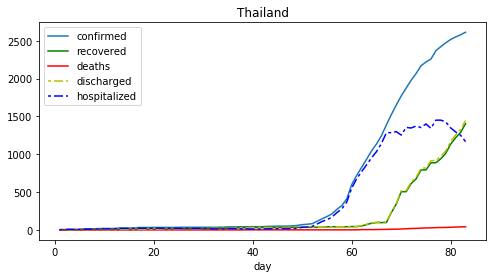

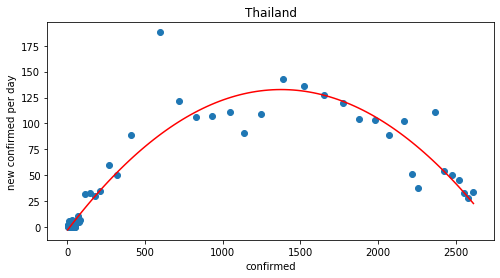

discharged:  1446
deaths:  41
%:  2.835408022130014


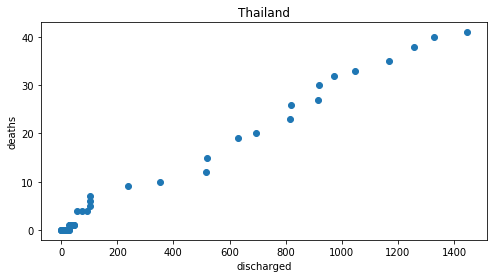

      date  confirmed  deaths  recovered
 2020-4-14       4987      82       2478
new  confirmed
     170.0


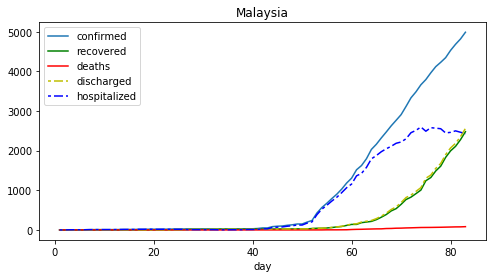

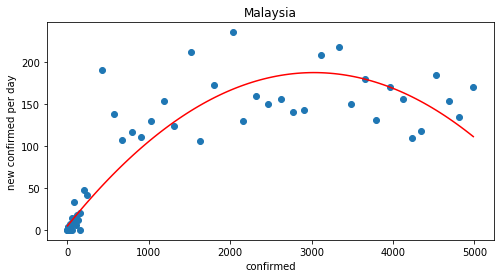

discharged:  2560
deaths:  82
%:  3.2031249999999996


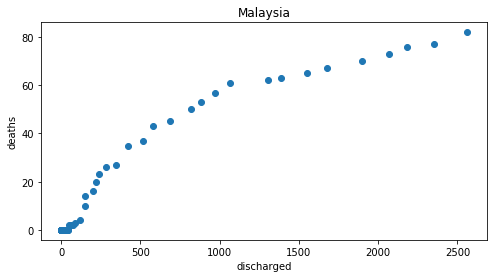

      date  confirmed  deaths  recovered
 2020-4-14       3252      10        611
new  confirmed
     334.0


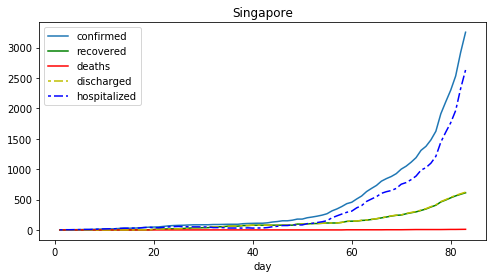

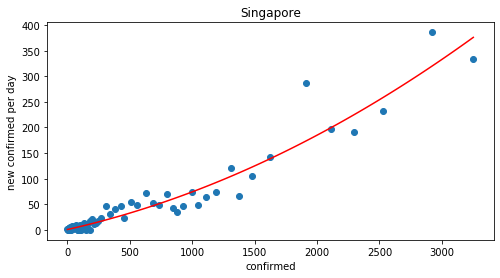

discharged:  621
deaths:  10
%:  1.610305958132045


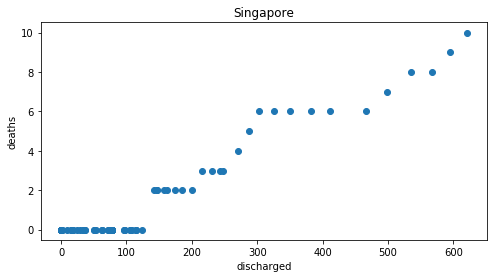

      date  confirmed  deaths  recovered
 2020-4-14       4839     459        426
new  confirmed
     282.0


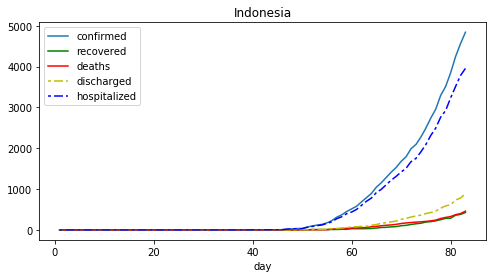

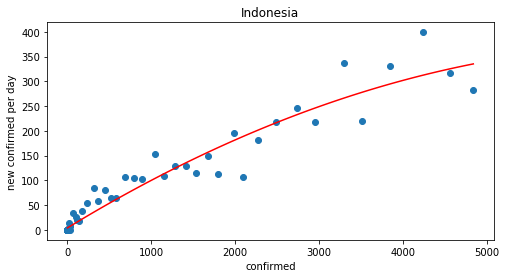

discharged:  885
deaths:  459
%:  51.864406779661024


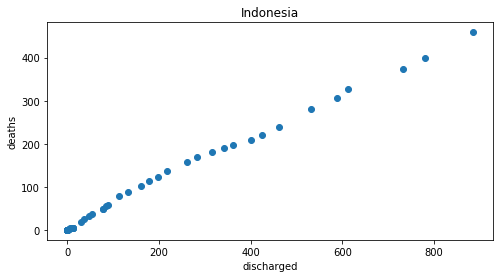

      date  confirmed  deaths  recovered
 2020-4-14     605193   25757      47763
new  confirmed
   24574.0


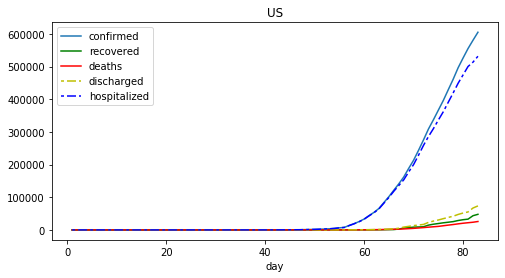

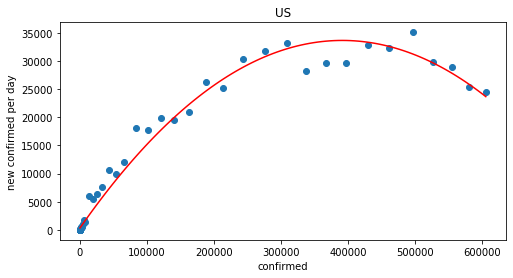

discharged:  73520
deaths:  25757
%:  35.03400435255713


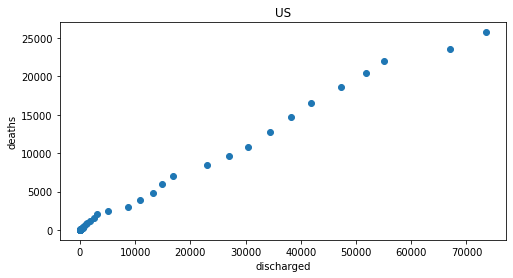

      date  confirmed  deaths  recovered
 2020-4-14      83306    3345      78200
new  confirmed
      93.0


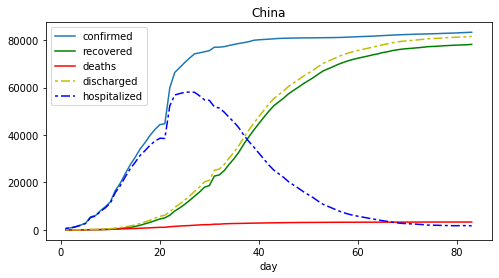

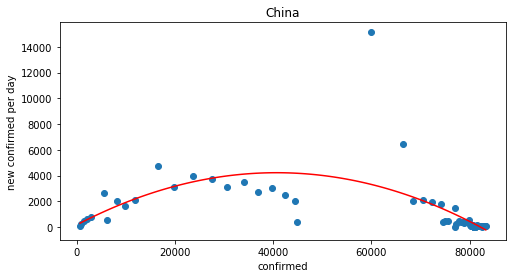

discharged:  81545
deaths:  3345
%:  4.102029554233859


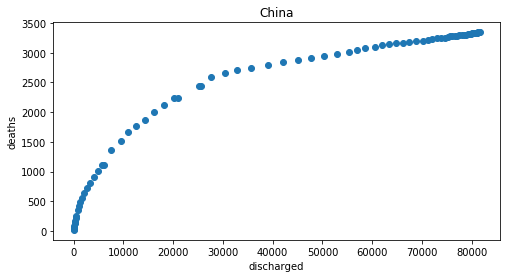

      date  confirmed  deaths  recovered
 2020-4-14      10564     222       7534
new  confirmed
      27.0


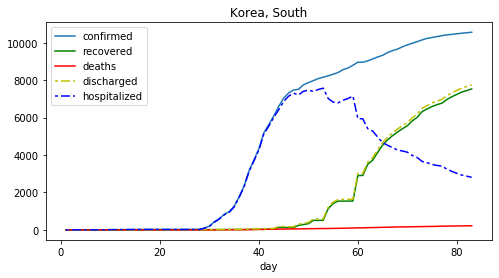

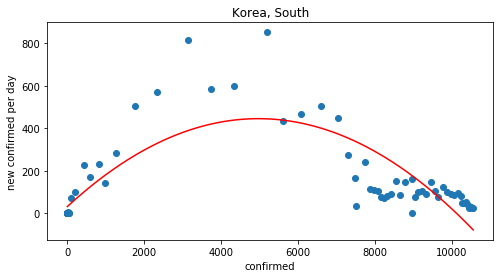

discharged:  7756
deaths:  222
%:  2.8623001547189273


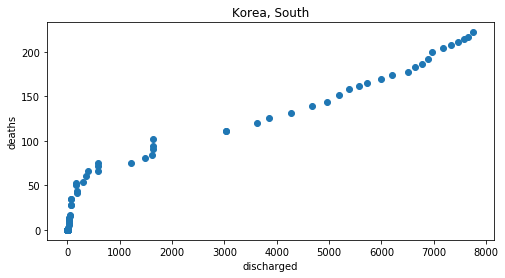

      date  confirmed  deaths  recovered
 2020-4-14     162488   21067      37130
new  confirmed
    2972.0


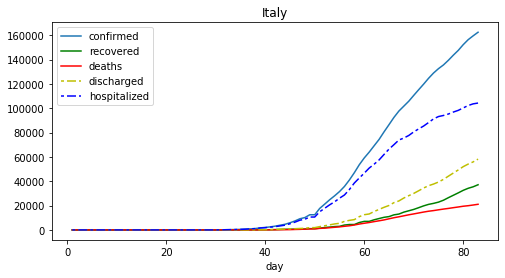

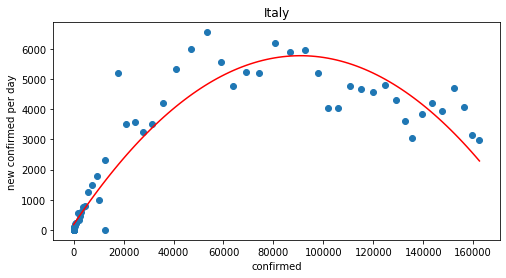

discharged:  58197
deaths:  21067
%:  36.19946045328797


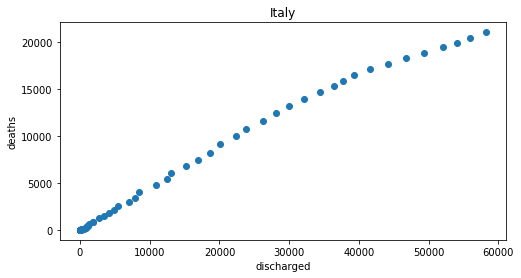

      date  confirmed  deaths  recovered
 2020-4-14     172541   18056      67504
new  confirmed
    2442.0


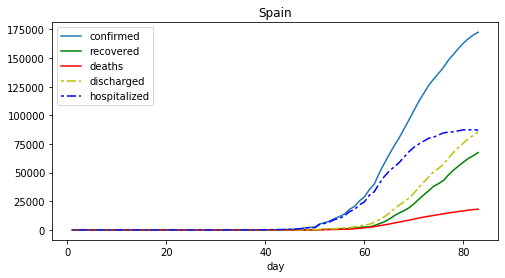

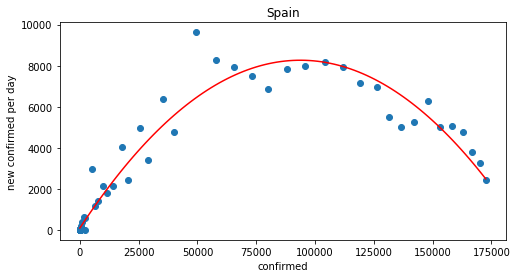

discharged:  85560
deaths:  18056
%:  21.103319308087894


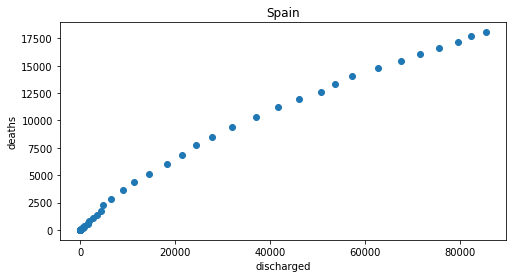

In [7]:
for c in ['Thailand','Malaysia','Singapore','Indonesia','US','China','Korea, South','Italy','Spain']:
    plot_country(c)
